In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [77]:
z_dna = {
    "species": [
        "Vanessa cardui",
        "Vanessa atalanta",
        "Melitaea cinxia",
        "Maniola jurtina",
        "Nymphalis io",
        "Vanessa tameamea",
        "Danaus plexippus"
    ],
    "Exons (%)": [7.86, 52.0, 25.74, 28.64, 41.33, 13.4, 45.64],
    "Introns (%)": [48.49, 28.6, 40.85, 44.83, 39.65, 61.25, 1.18],
    "Promoters (%)": [2.25, 3.8, 2.82, 2.95, 3.32, 3.06, 0.0],
    "Downstream (%)": [0.37, 0.5, 0.62, 0.45, 0.49, 0.6, 0.0],
    "Intergenic (%)": [41.01, 22.4, 29.96, 23.13, 22.77, 35.23, 27.58]
}

In [78]:
z_dna_df = pd.DataFrame(
    z_dna
).set_index('species')

z_dna_df

,Exons (%),Introns (%),Promoters (%),Downstream (%),Intergenic (%)
species,,,,,
Vanessa cardui,7.86,48.49,2.25,0.37,41.01
Vanessa atalanta,52.00,28.60,3.80,0.50,22.40
Melitaea cinxia,25.74,40.85,2.82,0.62,29.96
Maniola jurtina,28.64,44.83,2.95,0.45,23.13
Nymphalis io,41.33,39.65,3.32,0.49,22.77
Vanessa tameamea,13.40,61.25,3.06,0.60,35.23
Danaus plexippus,45.64,1.18,0.00,0.00,27.58


In [79]:
def plot_heatmap(data: pd.DataFrame):
    corr = data.T.corr()
    mask = np.tril(np.ones_like(corr, dtype=bool))
    
    cmap = sns.color_palette("vlag", as_cmap=True)
    sns.set_theme(style="white")

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    ax.invert_yaxis()

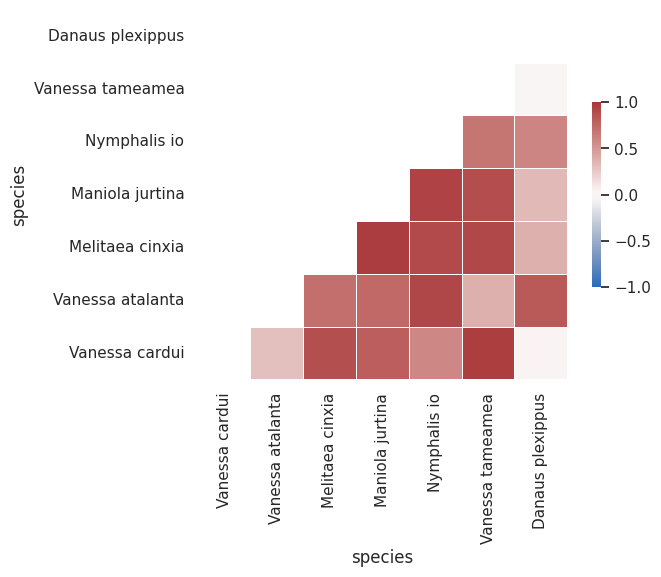

In [80]:
plot_heatmap(z_dna_df)

In [81]:
quad = {
    'species': [
        'Vanessa cardui',
        'Vanessa atalanta',
        'Melitaea cinxia',
        'Maniola jurtina',
        'Nymphalis io',
        'Vanessa tameamea',
        'Danaus plexippus'
    ],
    'exons': [
        26.37,
        9.7,
        9.46,
        18.42,
        19.64,
        4.34,
        0.0
    ],
    'introns': [
        42.62,
        41.6,
        40.46,
        50.86,
        7.3,
        56.83,
        32.62
    ],
    'promotors': [
        3.19,
        14.0,
        3.25,
        3.08,
        1.41,
        2.76,
        5.47
    ],
    'downstream': [
        0.49,
        2.8,
        1.05,
        0.53,
        3.36,
        0.64,
        1.33
    ],
    'intergenic': [
        27.31,
        31.8,
        45.78,
        27.11,
        39.36,
        40.3,
        37.95
    ]
}


In [82]:
quad_df = pd.DataFrame(
    quad
).set_index('species')

quad_df

,exons,introns,promotors,downstream,intergenic
species,,,,,
Vanessa cardui,26.37,42.62,3.19,0.49,27.31
Vanessa atalanta,9.70,41.60,14.00,2.80,31.80
Melitaea cinxia,9.46,40.46,3.25,1.05,45.78
Maniola jurtina,18.42,50.86,3.08,0.53,27.11
Nymphalis io,19.64,7.30,1.41,3.36,39.36
Vanessa tameamea,4.34,56.83,2.76,0.64,40.30
Danaus plexippus,0.00,32.62,5.47,1.33,37.95


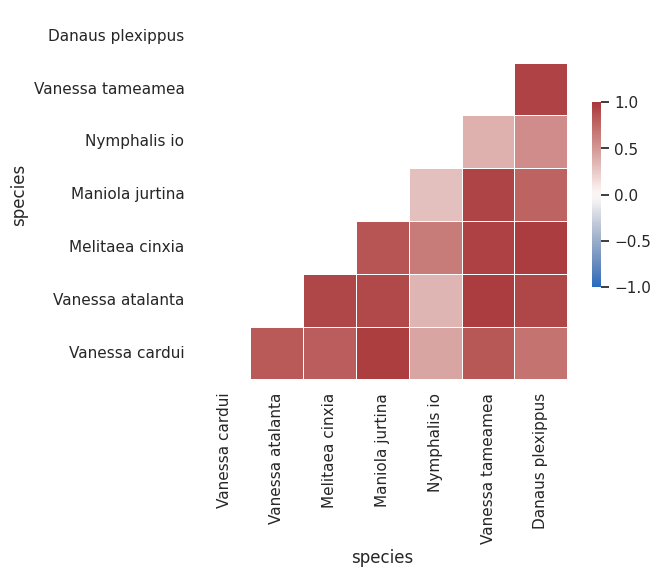

In [83]:
plot_heatmap(quad_df)